# Data-driven modeling - Tutorial 1 - Basic regression problem
Lecturer: Dr.-Ing. Mauricio Fernández

## Contents of this tutorial

* [1. Basic regression problem](#1.-Basic-regression-problem)
* [2. Solution](#2.-Solution)
    * [2.1 Data](#2.1-Data)
    * [2.2 Model](#2.2-Model)
    * [2.3 Train model](#2.3-Train-model)
    * [2.4 Evaluate after training](#2.4-Evaluate-after-training)

## 1. Basic regression problem

Approximate the function
$$
    y(x_1,x_2) = 3 \sin(x_1+x_2)+10
$$

## Exercise

Create training data and train an ANN

* For $(x_1,x_2) \in [0,\pi] \times [0,2\pi]$ generate a grid with 20 points in each direction.
* Evaluate the function $y(x_1,x_2) = 3 \sin(x_1+x_2) + 10$ for the generated points.
* Build a tf.keras model with two hidden-layers, 16 and 8 neurons. Use the RELU activation function.
* Plot the data and the model output at its initialization.
* Train the model based on the MSE.
* Plot the data and the model output after training for 500 epochs.

## 2. Solution

Needed modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from mpl_toolkits import mplot3d

### 2.1 Data

Input and output

In [2]:
xs = np.array([
    [x1, x2] 
    for x1 in np.linspace(0, np.pi, 20) 
    for x2 in np.linspace(0, 2 * np.pi, 20)
    ])
ys = 3 * np.sin(np.sum(xs, axis=1, keepdims=True)) + 10
print(xs.shape)
print(ys.shape)

(400, 2)
(400, 1)


In [3]:
print(np.mean(xs, axis=0))
print(np.std(xs, axis=0))

[1.57079633 3.14159265]
[0.95343721 1.90687442]


Rescale with mean and standard deviation for better usage of activation functions

In [4]:
mu = np.mean(xs, axis=0)
sig = np.std(xs, axis=0)
xs = (xs - mu) / sig

In [5]:
print(np.mean(xs, axis=0))
print(np.std(xs, axis=0))

[ 7.42739203e-16 -3.53606033e-16]
[1. 1.]


### 2.2 Model

Model and summary

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=[2]),  # 16x2 + 16 = 48
    tf.keras.layers.Dense(units=8, activation='relu'),  # 8x16 + 8 = 136
    tf.keras.layers.Dense(units=1)  # 1x8 + 1 = 9
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


Compile

In [7]:
model.compile(loss='mse', optimizer='adam')

Plot initial predictions

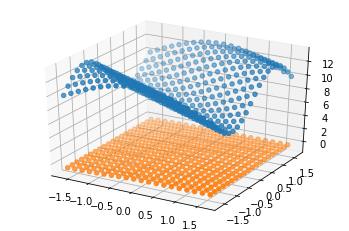

In [8]:
ys_m = model.predict(xs)

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xs[:, 0], xs[:, 1], ys)
ax.scatter(xs[:, 0], xs[:, 1], ys_m)
plt.show()

Evaluate model (get loss = MSE in this case)

In [9]:
model.evaluate(xs, ys)

400/400 [==============================] - 0s 190us/sample - loss: 111.8853


111.8853384399414

In [10]:
np.mean((ys - ys_m)**2)

111.88533934080863

### 2.3 Train model

In [11]:
model.fit(xs, ys, epochs=500, verbose=2)

Train on 400 samples
Epoch 1/500
400/400 - 0s - loss: 110.3239
Epoch 2/500
400/400 - 0s - loss: 107.3141
Epoch 3/500
400/400 - 0s - loss: 104.7418
Epoch 4/500
400/400 - 0s - loss: 102.4411
Epoch 5/500
400/400 - 0s - loss: 100.3386
Epoch 6/500
400/400 - 0s - loss: 98.2444
Epoch 7/500
400/400 - 0s - loss: 96.0905
Epoch 8/500
400/400 - 0s - loss: 93.6534
Epoch 9/500
400/400 - 0s - loss: 90.5268
Epoch 10/500
400/400 - 0s - loss: 86.8160
Epoch 11/500
400/400 - 0s - loss: 82.5989
Epoch 12/500
400/400 - 0s - loss: 77.9875
Epoch 13/500
400/400 - 0s - loss: 72.9385
Epoch 14/500
400/400 - 0s - loss: 67.4844
Epoch 15/500
400/400 - 0s - loss: 61.7093
Epoch 16/500
400/400 - 0s - loss: 55.8425
Epoch 17/500
400/400 - 0s - loss: 49.8847
Epoch 18/500
400/400 - 0s - loss: 43.9673
Epoch 19/500
400/400 - 0s - loss: 38.2430
Epoch 20/500
400/400 - 0s - loss: 32.7997
Epoch 21/500
400/400 - 0s - loss: 27.7056
Epoch 22/500
400/400 - 0s - loss: 23.0551
Epoch 23/500
400/400 - 0s - loss: 19.0504
Epoch 24/500
400/

Epoch 198/500
400/400 - 0s - loss: 0.7242
Epoch 199/500
400/400 - 0s - loss: 0.7173
Epoch 200/500
400/400 - 0s - loss: 0.7110
Epoch 201/500
400/400 - 0s - loss: 0.7079
Epoch 202/500
400/400 - 0s - loss: 0.7043
Epoch 203/500
400/400 - 0s - loss: 0.6918
Epoch 204/500
400/400 - 0s - loss: 0.6868
Epoch 205/500
400/400 - 0s - loss: 0.6822
Epoch 206/500
400/400 - 0s - loss: 0.6770
Epoch 207/500
400/400 - 0s - loss: 0.6706
Epoch 208/500
400/400 - 0s - loss: 0.6648
Epoch 209/500
400/400 - 0s - loss: 0.6595
Epoch 210/500
400/400 - 0s - loss: 0.6527
Epoch 211/500
400/400 - 0s - loss: 0.6454
Epoch 212/500
400/400 - 0s - loss: 0.6409
Epoch 213/500
400/400 - 0s - loss: 0.6362
Epoch 214/500
400/400 - 0s - loss: 0.6317
Epoch 215/500
400/400 - 0s - loss: 0.6224
Epoch 216/500
400/400 - 0s - loss: 0.6184
Epoch 217/500
400/400 - 0s - loss: 0.6132
Epoch 218/500
400/400 - 0s - loss: 0.6125
Epoch 219/500
400/400 - 0s - loss: 0.6031
Epoch 220/500
400/400 - 0s - loss: 0.5961
Epoch 221/500
400/400 - 0s - loss:

400/400 - 0s - loss: 0.1120
Epoch 394/500
400/400 - 0s - loss: 0.1093
Epoch 395/500
400/400 - 0s - loss: 0.1092
Epoch 396/500
400/400 - 0s - loss: 0.1094
Epoch 397/500
400/400 - 0s - loss: 0.1083
Epoch 398/500
400/400 - 0s - loss: 0.1068
Epoch 399/500
400/400 - 0s - loss: 0.1057
Epoch 400/500
400/400 - 0s - loss: 0.1046
Epoch 401/500
400/400 - 0s - loss: 0.1054
Epoch 402/500
400/400 - 0s - loss: 0.1032
Epoch 403/500
400/400 - 0s - loss: 0.1025
Epoch 404/500
400/400 - 0s - loss: 0.1002
Epoch 405/500
400/400 - 0s - loss: 0.0996
Epoch 406/500
400/400 - 0s - loss: 0.0990
Epoch 407/500
400/400 - 0s - loss: 0.0991
Epoch 408/500
400/400 - 0s - loss: 0.0974
Epoch 409/500
400/400 - 0s - loss: 0.0964
Epoch 410/500
400/400 - 0s - loss: 0.0959
Epoch 411/500
400/400 - 0s - loss: 0.0945
Epoch 412/500
400/400 - 0s - loss: 0.0977
Epoch 413/500
400/400 - 0s - loss: 0.0930
Epoch 414/500
400/400 - 0s - loss: 0.0941
Epoch 415/500
400/400 - 0s - loss: 0.0916
Epoch 416/500
400/400 - 0s - loss: 0.0909
Epoch 

### 2.4 Evaluate after training

Plot predictions after training

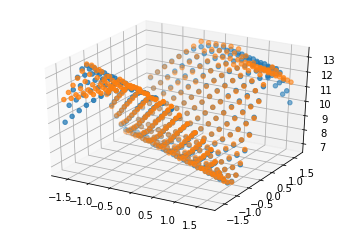

In [12]:
ys_m = model.predict(xs)

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xs[:, 0], xs[:, 1], ys)
ax.scatter(xs[:, 0], xs[:, 1], ys_m)
plt.show()

Evaluate loss of model (loss = MSE in this case)

In [13]:
model.evaluate(xs, ys)

400/400 [==============================] - 0s 39us/sample - loss: 0.0444


0.04438279166817665

In [14]:
np.mean((ys - ys_m)**2)

0.044382775547451604